In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("C:/Users/louis/datatech/Database/walmart_fraudes.db")
cursor = conn.cursor()

In [15]:
cursor.execute("PRAGMA table_info(missing_items);")
for coluna in cursor.fetchall():
    print(coluna)


(0, 'order_id', 'TEXT', 0, None, 0)
(1, 'product_id_1', 'TEXT', 0, None, 0)
(2, 'product_id_2', 'TEXT', 0, None, 0)
(3, 'product_id_3', 'TEXT', 0, None, 0)


In [16]:
query = """
SELECT m.order_id, o.driver_id, m.product_id_1 AS product_id
FROM missing_items m
JOIN orders o ON m.order_id = o.order_id
WHERE m.product_id_1 IS NOT NULL

UNION ALL

SELECT m.order_id, o.driver_id, m.product_id_2 AS product_id
FROM missing_items m
JOIN orders o ON m.order_id = o.order_id
WHERE m.product_id_2 IS NOT NULL

UNION ALL

SELECT m.order_id, o.driver_id, m.product_id_3 AS product_id
FROM missing_items m
JOIN orders o ON m.order_id = o.order_id
WHERE m.product_id_3 IS NOT NULL;
"""

df_diferencas = pd.read_sql_query(query, conn)
df_diferencas.head()



,order_id,driver_id,product_id
0,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,WDID09873,PWPX0982761090982
1,20698293-8399-4fda-af1e-b61a9ebb8a0a,WDID09874,PWPX0982761090983
2,d7f690a0-c1c2-4b36-b05f-2b7e641ea1ac,WDID09875,PWPX0982761090984
3,d5cea1eb-7016-451b-9426-51973f4d6e14,WDID09876,PWPX0982761090985
4,2f7cbda8-793a-4a1d-bb66-3a514bee5dc4,WDID09877,PWPX0982761090986


In [17]:
query = """
SELECT m.order_id, m.driver_id, p.product_name
FROM (
    SELECT m.order_id, o.driver_id, m.product_id_1 AS product_id
    FROM missing_items m
    JOIN orders o ON m.order_id = o.order_id
    WHERE m.product_id_1 IS NOT NULL

    UNION ALL

    SELECT m.order_id, o.driver_id, m.product_id_2 AS product_id
    FROM missing_items m
    JOIN orders o ON m.order_id = o.order_id
    WHERE m.product_id_2 IS NOT NULL

    UNION ALL

    SELECT m.order_id, o.driver_id, m.product_id_3 AS product_id
    FROM missing_items m
    JOIN orders o ON m.order_id = o.order_id
    WHERE m.product_id_3 IS NOT NULL
) AS m
JOIN products p ON m.product_id = p.product_id;
"""

df_diferencas_produtos = pd.read_sql_query(query, conn)
df_diferencas_produtos.head()


,order_id,driver_id,product_name
0,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,WDID09873,Kellogg's Frosties
1,20698293-8399-4fda-af1e-b61a9ebb8a0a,WDID09874,Uncured Bacon
2,d7f690a0-c1c2-4b36-b05f-2b7e641ea1ac,WDID09875,Whole Milk
3,d5cea1eb-7016-451b-9426-51973f4d6e14,WDID09876,Organic Bananas
4,2f7cbda8-793a-4a1d-bb66-3a514bee5dc4,WDID09877,Sourdough Bread


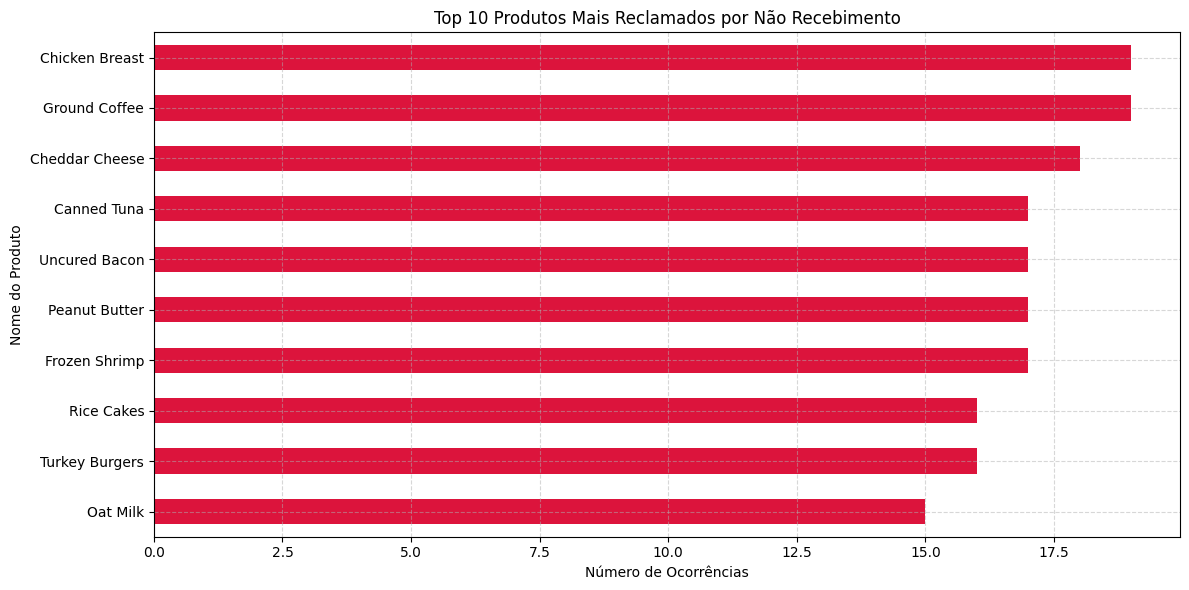

In [18]:
# Agrupa e ordena os produtos mais reportados
top_produtos = df_diferencas_produtos['product_name'].value_counts().head(10)

# Plot horizontal
plt.figure(figsize=(12, 6))
top_produtos[::-1].plot(kind='barh', color='crimson')

plt.xlabel('Número de Ocorrências')
plt.ylabel('Nome do Produto')
plt.title('Top 10 Produtos Mais Reclamados por Não Recebimento')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
